In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

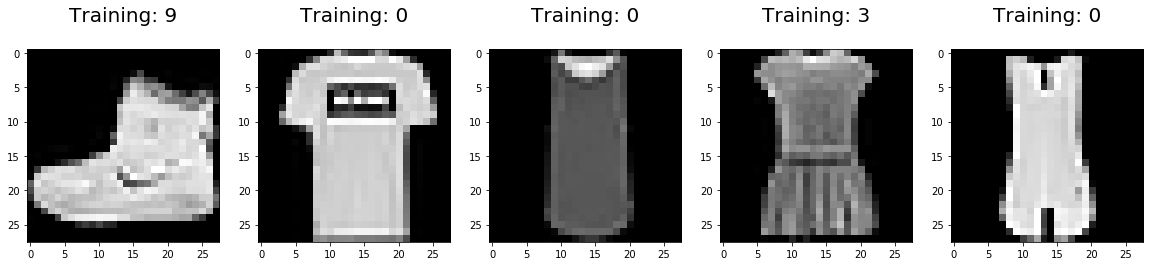

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:5], train_labels[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [8]:
nsamples, nx, ny = train_images.shape
d2_train_dataset = train_images.reshape((nsamples,nx*ny))
#logisticRegr.fit(train_images, train_labels)

In [9]:
logisticRegr.fit(d2_train_dataset, train_labels)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
logisticRegr.predict(test_images[0].reshape(1,-1))

array([9], dtype=uint8)

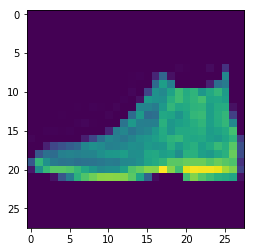

In [11]:
plt.imshow(test_images[0])

In [12]:
nsamples1, nx1, ny1 = test_images.shape
d2_test_dataset = test_images.reshape((nsamples1,nx1*ny1))

In [13]:
logisticRegr.predict(d2_test_dataset[0:10])

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [14]:
predictions = logisticRegr.predict(d2_test_dataset)

In [15]:
predictions

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [16]:
score = logisticRegr.score(d2_test_dataset, test_labels)
print(score*100, '%')

83.81 %


In [17]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_labels, predictions):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

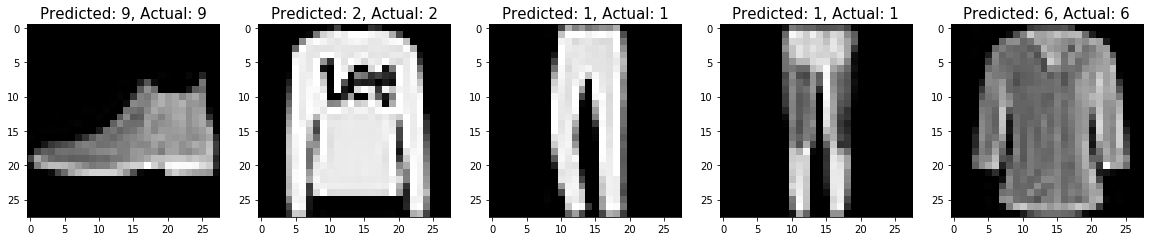

In [18]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_images[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_labels[badIndex]), fontsize = 15)